# Import Textblob and pandas

In [1]:
import pandas as pd
from textblob import TextBlob

# Load the csv and look at it

In [2]:
df = pd.read_csv("tweets.csv",index_col=0)
df.head()

,text,favorited,favoriteCount,replyToSN,created,truncated,id,replyToUID,statusSource,screenName,retweetCount,firm,who
1,This Merlene correcting her Husband for joking...,False,0,NaN,2/27/19 18:41,False,1.100830e+18,NaN,"<a href=""http://www.twitpane.com"" rel=""nofollo...",mindofmrcole,0,olive+garden,waitress
2,"This ain't just lil kids though, me n my frien...",False,4,NaN,2/27/19 14:14,True,1.100760e+18,NaN,"<a href=""http://twitter.com/download/iphone"" r...",AlexHamilton_51,0,olive+garden,waitress
3,wheres jonell so i can tell her that tomato st...,False,0,NaN,2/27/19 13:22,True,1.100750e+18,NaN,"<a href=""http://twitter.com/download/iphone"" r...",Kirbifier,0,olive+garden,waitress
4,@IvankaTrump We need to make enough $ to survi...,False,5,IvankaTrump,2/27/19 12:29,True,1.100730e+18,52544275.0,"<a href=""http://twitter.com/download/iphone"" r...",hillard_jean,0,olive+garden,waitress
5,The Sopranos (2049)\r\n\r\nInt. Olive Garden -...,False,2,NaN,2/27/19 7:03,True,1.100650e+18,NaN,"<a href=""http://twitter.com/download/iphone"" r...",RoyleRich,0,olive+garden,waitress


# How many of each resturant to I have?

In [3]:
df.firm.value_counts()

olive+garden          1648
waffle+house           758
ihop                   635
hooters                407
applebee               324
texas+roadhouse        191
red+lobster            175
outback                161
buffalo+wings          129
cheesecake+factory     118
cracker+barrel         105
perkins                 62
TGI                     56
chilli                  38
longhorn                36
bob+evans               30
chang's                 30
bjs                     27
ruby+tuesday            14
california+pizza        14
carrabbas                3
Name: firm, dtype: int64

# What about the waiter/waitress split?

In [4]:
df.who.value_counts()

waitress    3484
waiter      1477
Name: who, dtype: int64

### A lot more waitress than waiter

# Put the text in a list for iteration

In [5]:
public_tweets = df['text'].tolist()

# For more information on TextBlob: https://textblob.readthedocs.io/en/dev/
# Extract sentiment from all tweets

In [6]:
# Create an empty list
tweets = []


for tweet in public_tweets:
    #this will create a textblob out of the tweet
    blob = TextBlob(tweet)
    #extract the sentiment attribute out of the textblob
    sentiment = blob.sentiment
    #if statements to give a label to the sentiment
    if sentiment[0]>0.5:
       tweets.append([tweet,sentiment[0],'positive'])
    elif sentiment[0]<-0.5:
       tweets.append([tweet,sentiment[0],'negative'])
    else:
       tweets.append([tweet,sentiment[0],'Neutral'])

# Turn list into pandas dataframe

In [7]:
tweets = pd.DataFrame(tweets,columns = ['text','sentiment score','label'])
tweets.head()

,text,sentiment score,label
0,This Merlene correcting her Husband for joking...,-0.291667,Neutral
1,"This ain't just lil kids though, me n my frien...",-0.500000,Neutral
2,wheres jonell so i can tell her that tomato st...,0.000000,Neutral
3,@IvankaTrump We need to make enough $ to survi...,0.000000,Neutral
4,The Sopranos (2049)\r\n\r\nInt. Olive Garden -...,0.000000,Neutral


# transfer sentiment score and label to original dataframe

In [8]:
df['sentiment score'] = tweets['sentiment score']
df['label'] = tweets['label']
df.head()

,text,favorited,favoriteCount,replyToSN,created,truncated,id,replyToUID,statusSource,screenName,retweetCount,firm,who,sentiment score,label
1,This Merlene correcting her Husband for joking...,False,0,NaN,2/27/19 18:41,False,1.100830e+18,NaN,"<a href=""http://www.twitpane.com"" rel=""nofollo...",mindofmrcole,0,olive+garden,waitress,-0.5,Neutral
2,"This ain't just lil kids though, me n my frien...",False,4,NaN,2/27/19 14:14,True,1.100760e+18,NaN,"<a href=""http://twitter.com/download/iphone"" r...",AlexHamilton_51,0,olive+garden,waitress,0.0,Neutral
3,wheres jonell so i can tell her that tomato st...,False,0,NaN,2/27/19 13:22,True,1.100750e+18,NaN,"<a href=""http://twitter.com/download/iphone"" r...",Kirbifier,0,olive+garden,waitress,0.0,Neutral
4,@IvankaTrump We need to make enough $ to survi...,False,5,IvankaTrump,2/27/19 12:29,True,1.100730e+18,52544275.0,"<a href=""http://twitter.com/download/iphone"" r...",hillard_jean,0,olive+garden,waitress,0.0,Neutral
5,The Sopranos (2049)\r\n\r\nInt. Olive Garden -...,False,2,NaN,2/27/19 7:03,True,1.100650e+18,NaN,"<a href=""http://twitter.com/download/iphone"" r...",RoyleRich,0,olive+garden,waitress,0.0,Neutral


# Whats the distribution of Sentiment in the database?

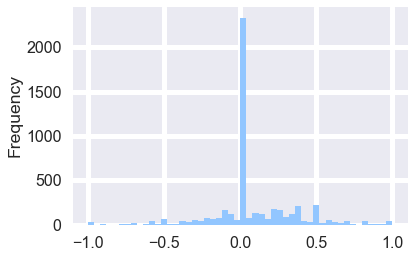

In [30]:
df['sentiment score'].plot.hist(stacked=True, bins=50)

# I want to graph the results with a box-plot 

Text(0.5,1,'Sentiment Score of Waitstaff by Firm')

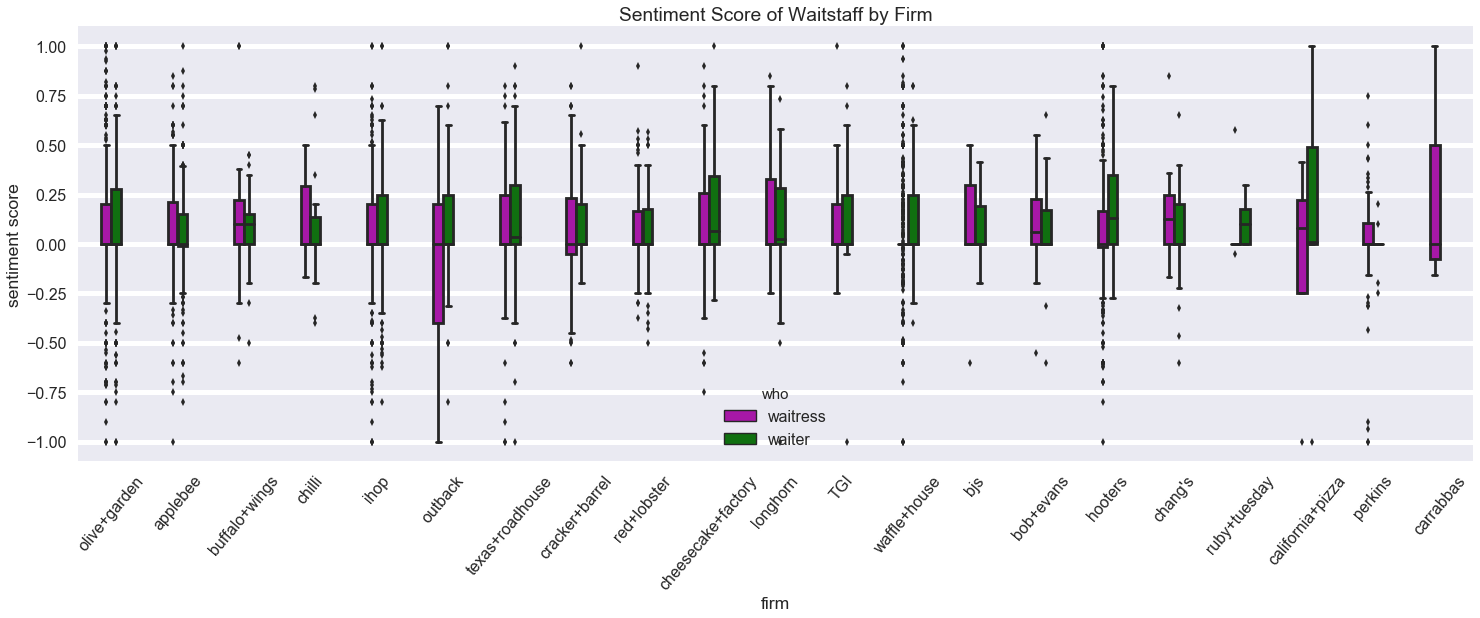

In [22]:
#import libaries
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

#set the looks of the graph
sns.set(palette="pastel")
sns.set_context("poster",rc={"grid.linewidth": 5})
plt.figure(figsize=(25, 8))
sns.despine(offset=5, trim=True)
plt.xticks(rotation=50)

#plot boxplot
sns.boxplot(x="firm", y="sentiment score", hue="who", palette=["m", "g"], data=df,width=0.3).set_title("Sentiment Score of Waitstaff by Firm")

# I want to segment the sentiment scores by resturant label so I use a groupby to find the average sentiment score

In [23]:
resurants = df.groupby(['firm'])['sentiment score'].mean()


# What are the worst Resturants?

In [11]:
resurants.sort_values().head(10)

firm
perkins        -0.016711
outback         0.009483
waffle+house    0.056725
hooters         0.057385
applebee        0.057647
red+lobster     0.066012
chang's         0.069127
bjs             0.072152
ihop            0.076058
bob+evans       0.076909
Name: sentiment score, dtype: float64

### looks like perkins needs to improve quite a bit

# What about the best resturants?

In [12]:
resurants.sort_values(ascending =False).head(10)

firm
carrabbas             0.281481
cheesecake+factory    0.131601
longhorn              0.113320
TGI                   0.112619
california+pizza      0.111825
texas+roadhouse       0.099113
buffalo+wings         0.097606
cracker+barrel        0.094902
ruby+tuesday          0.091922
chilli                0.086441
Name: sentiment score, dtype: float64

### carrabbas is looking good but remember that there was only 3 tweets of them in the whole data set

# What about waitstaff?

In [13]:
waitstaff = df.groupby(['who'])['sentiment score'].mean()


In [14]:
waitstaff.sort_values().head(10)

who
waitress    0.06661
waiter      0.09148
Name: sentiment score, dtype: float64

### looks like waiters are slightly ahead

# What about both combined?
### I'll use the same groupby but to do two things at once you need to pass a list into the first part like so

In [15]:
both = df.groupby(['firm','who'])['sentiment score'].mean()

# This is what it will look like
## This is called a multi-indexed dataframe

In [16]:
both.head()

firm      who     
TGI       waiter      0.114063
          waitress    0.110694
applebee  waiter      0.040356
          waitress    0.074517
bjs       waiter      0.058475
Name: sentiment score, dtype: float64

# You're able to call either the main or both levels like so
### This is nice if you need to filter or iterate over some data

In [17]:
both['TGI']

who
waiter      0.114063
waitress    0.110694
Name: sentiment score, dtype: float64

# or

In [18]:
both['TGI']['waiter']

0.11406250000000001

# Here's how I got value counts for the two columns.
## You can't just call value_counts because it takes a series

In [19]:
df.groupby(["firm", "who"]).size().sort_values(ascending =False)

firm                who     
olive+garden        waitress    1180
waffle+house        waitress     690
olive+garden        waiter       468
ihop                waitress     424
hooters             waitress     387
ihop                waiter       211
applebee            waitress     164
                    waiter       160
texas+roadhouse     waiter        98
red+lobster         waitress      95
texas+roadhouse     waitress      93
outback             waitress      84
red+lobster         waiter        80
cracker+barrel      waitress      77
outback             waiter        77
buffalo+wings       waitress      70
waffle+house        waiter        68
cheesecake+factory  waiter        59
buffalo+wings       waiter        59
cheesecake+factory  waitress      59
perkins             waitress      52
TGI                 waiter        32
cracker+barrel      waiter        28
chilli              waiter        26
TGI                 waitress      24
chang's             waiter        21
hooters  

# Moving on to the actual question

# which group does the worst?

In [20]:
both.sort_values().head(10)

firm              who     
california+pizza  waitress   -0.105833
outback           waitress   -0.064989
perkins           waitress   -0.016719
                  waiter     -0.016667
chang's           waiter      0.019444
applebee          waiter      0.040356
red+lobster       waiter      0.048245
longhorn          waiter      0.049241
hooters           waitress    0.050409
waffle+house      waitress    0.052004
Name: sentiment score, dtype: float64

## Looks like california pizza needs to look into their waitresses
## but remember they didn't have a lot of observations in the dataset (only 4) so outback is the loser here to me

# What about the best groups?

In [21]:
both.sort_values(ascending =False).head(10)

firm                who     
carrabbas           waitress    0.281481
california+pizza    waiter      0.198889
hooters             waiter      0.192367
chang's             waitress    0.185053
cheesecake+factory  waiter      0.177990
longhorn            waitress    0.164583
texas+roadhouse     waiter      0.126524
cracker+barrel      waiter      0.119898
TGI                 waiter      0.114063
                    waitress    0.110694
Name: sentiment score, dtype: float64

In [ ]:
sns.barplot(x="frim", y="firm", data=df)